In [1]:
%load_ext autoreload
%autoreload 2

from mcmc_conor import *
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
from scipy.stats import gaussian_kde



In [2]:
#importing dti matrix
with open('DTI_avg_log.csv', 'r') as file:
    reader = csv.reader(file, delimiter=',')
    data = list(reader)
DTI_log = pd.DataFrame(data, dtype = 'float64')
DTI= DTI_log.values
n = 90
############hhhhh

In [3]:
#importing fmri matrix
with open('fMRI_avg.csv', 'r') as file:
    reader = csv.reader(file, delimiter=',')
    data = list(reader)
fMRI = pd.DataFrame(data, dtype = 'float64')
fMRI = fMRI.values
n = 90

In [3]:
print('hello')

hello


In [4]:
J = conn_matrix_not_so_basic(5, 0.5)
print(J)

[[0.         0.         0.13210839 0.         0.12517338]
 [0.         0.         0.         0.09797547 0.42462573]
 [0.13210839 0.         0.         0.         0.93087943]
 [0.         0.09797547 0.         0.         0.        ]
 [0.12517338 0.42462573 0.93087943 0.         0.        ]]


c:\Users\conor\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\conor\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


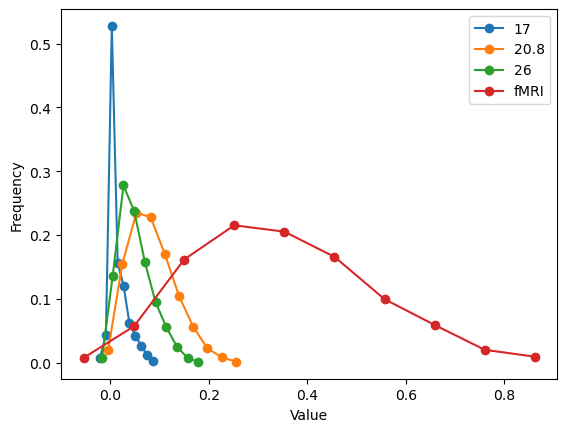

In [6]:
temps = [17, 20.8, 26]

# First dataset
for T in temps:
    a, b, c, d, mean_corr, corr_list = multi_metropolis(100, 5000, T, 90, 0, DTI)
    matrix = mean_corr
    rows = len(matrix)
    cols = len(matrix[0])
    corrs = []
    for i in range(rows):
        for j in range(cols):
            if i != j:
                corrs.append(matrix[i][j])

    corrs = np.array(corrs, dtype=np.float64)
   
    corrs = np.nan_to_num(corrs, nan=0)

    hist, bins = np.histogram(corrs, bins=10)
    hist = hist / len(corrs)

    bin_centers = (bins[:-1] + bins[1:]) / 2

    plt.plot(bin_centers, hist, '-o', label=f'{T}')



#fmri bit
matrix = fMRI
rows = len(matrix)
cols = len(matrix[0])
corrs = []
for i in range(rows):
    for j in range(cols):
        if i != j:
            corrs.append(matrix[i][j])

hist_second, bins_second = np.histogram(corrs, bins=10)
hist_second = hist_second / len(corrs)
bin_centers_second = (bins_second[:-1] + bins_second[1:]) / 2

plt.plot(bin_centers_second, hist_second, '-o', label='fMRI')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')

# Displaying the legend
plt.legend()

# Displaying the histogram
plt.show()

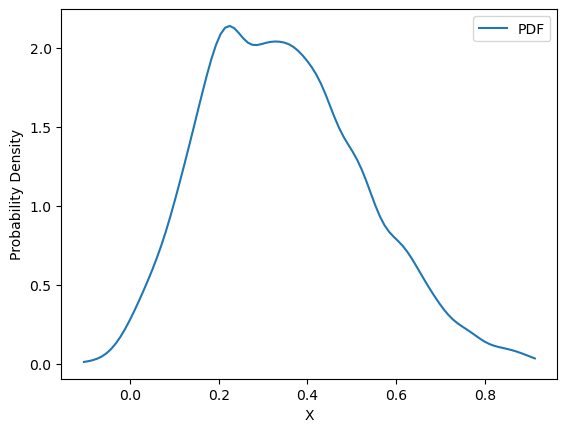

In [38]:
#distribution of FMRI
matrix = fMRI
rows = len(matrix)
cols = len(matrix[0])
corrs = []
for i in range(rows):
    for j in range(cols):
        if i != j:
            corrs.append(matrix[i][j])

pdf(corrs)

[-1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.
  1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.]


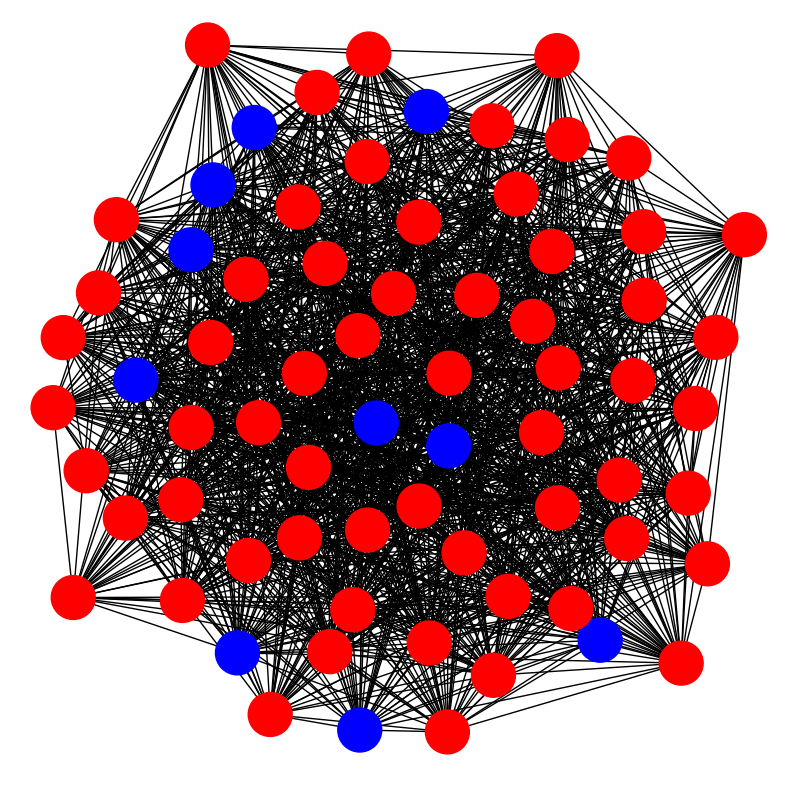

In [229]:
adjacency_matrix = conn_matrix_not_so_basic(70, 0.4)
spins = random_spins(70)
data = metropolis(spins, 2500, 18.5, adjacency_matrix)[4]
print(data)
#print(adjacency_matrix)

graph = nx.Graph()

for i, d in enumerate(data):
    color = 'red' if d == 1 else 'blue'
    graph.add_node(i, color=color)

num_nodes = len(data)
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        if adjacency_matrix[i, j] != 0:
            graph.add_edge(i, j)

plt.figure(figsize=(10, 10))
node_size = 1000

node_colors = [graph.nodes[i]['color'] for i in graph.nodes]

pos = nx.spring_layout(graph, k=0.2)
nx.draw_networkx(graph, pos, node_color=node_colors, with_labels=False, node_size=node_size)

plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.axis('off')

# Show the plot
plt.show()

In [14]:
test_name = 'numba_test'
temperatures = np.linspace(19.5, 22, 100)

In [15]:
sim_data = run_simulation(50, 5000, temperatures, 90, 0, DTI)

c:\Users\conor\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\conor\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


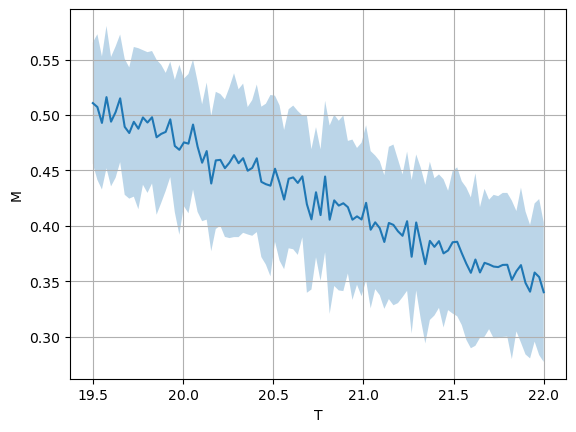

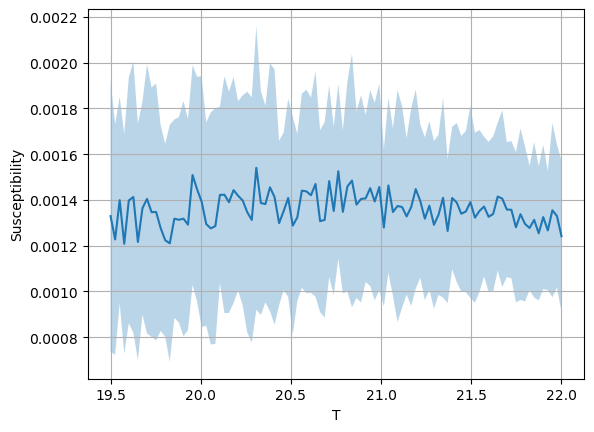

In [16]:
plot_results(sim_data, temperatures, test_name, save=False)